<a href="https://colab.research.google.com/github/aman-spp/Image_Processing_project/blob/main/Image_Processing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.models import model_from_json
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
json_file = open('/content/drive/MyDrive/IP/model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('/content/drive/MyDrive/IP/model.h5')

model = loaded_model

In [ ]:
cascade= cv2.CascadeClassifier("/content/drive/MyDrive/IP/haarcascade_russian_plate_number.xml")

states={"AN":"Andaman and Nicobar","AP":"Andhra Pradesh","AR":"Arunachal Pradesh","AS":"Assam",
        "BR":"Bihar","CH":"Chandigarh","DN":"Dadra and Nagar Haveli","DD":"Daman and Diu",
        "DL":"Delhi","GA":"Goa","GJ":"Gujarat","HR":"Haryana","HP":"Himachal Pradesh",
"JK":"Jammu and Kashmir","KA":"Karnataka","KL":"Kerala","LD":"Lakshadweep","MP":"Madhya Pradesh",
"MH":"Maharashtra","MN":"Manipur","ML":"Meghalaya","MZ":"Mizoram","NL":"Nagaland","OD":"Odissa",
"PY":"Pondicherry","PN":"Punjab","RJ":"Rajasthan","SK":"Sikkim","TN":"TamilNadu","TR":"Tripura","UP":"Uttar Pradesh", 
"WB":"West Bengal","CG":"Chhattisgarh","TS":"Telangana","JH":"Jharkhand","UK":"Uttarakhand"}


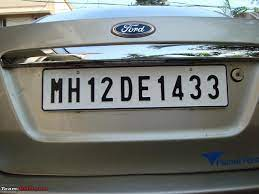

In [ ]:
path = '/content/drive/MyDrive/IP/4.jpg'
img = cv2.imread(path) 
cv2_imshow(img)

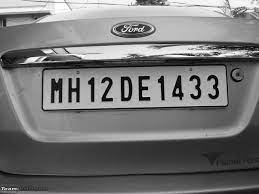

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
cv2_imshow(gray)

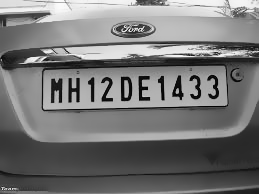

In [ ]:
gray = cv2.bilateralFilter(gray,11,17,17)
cv2_imshow(gray)

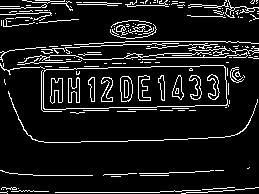

In [ ]:
edged = cv2.Canny(gray,170,200)
cv2_imshow(edged)

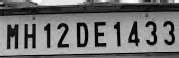

In [ ]:
nplate = cascade.detectMultiScale(gray,1.1,4)

# print(nplate)

plate_coords = []

for (x,y,w,h) in nplate:
# Crop a portion of plate

  a,b = (int(0.020*img.shape[0]), int(0.025*img.shape[1]))
  plate = img[y+a:y+h-a, x+b:x+w-b, :]
  plate_coords.append([x,y,w,h])
# Image Processing 

kernel = np.ones((2, 2), np.uint8)

#Dilation

#Applying thresholding

plate = cv2.cvtColor(plate,cv2.COLOR_BGR2GRAY)
plate_erode = cv2.erode(plate, kernel, iterations=1)
plate_dilate = cv2.dilate(plate_erode, kernel, iterations=1)
cv2_imshow(plate_dilate)

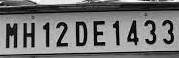

In [ ]:
#original image
cv2_imshow(plate)

In [ ]:
characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

im = plate_dilate.copy()
im = cv2.resize(im,(180,60))
ret,thresh1 = cv2.threshold(im,60,255,cv2.THRESH_BINARY)
kernel = np.ones((1, 2), np.uint8)
thresh1 = cv2.dilate(thresh1, kernel, iterations=1)
contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	#bound the images
	cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),3)
i=0
m = []
pchl = []

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w>10 and w<160 and h>10 and h<160 :
      try:
        roi = thresh1[y:y+h,x:x+w]
        roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
        roi = cv2.erode(roi, kernel, iterations=1)
        roi = np.array(roi)
        t = np.copy(roi)
        t = t / 255.0
        t = 1-t
        t = t.reshape(1,784)
        m.append(roi)
        pred = np.argmax(model.predict(t))
        pchl.append(pred)
        
      except Exception as e:
        continue

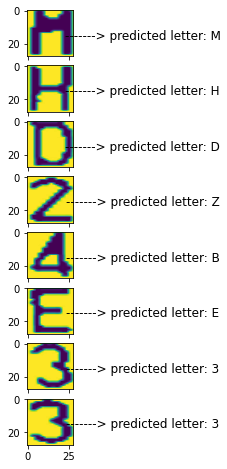

Predicted String: MHDZBE33


In [ ]:
pcw = []
interp = 'bilinear'
size = len(m)

fig, axs = plt.subplots(nrows=size, sharex=True, figsize=(1,size))
for i in range(len(pchl)):
    #print (pchl[i][0])
    pcw.append(characters[pchl[i]])
    axs[i].set_title('-------> predicted letter: '+characters[pchl[i]], x=2.5,y=0.24)
    axs[i].imshow(m[i], interpolation=interp)

plt.show()


predstring = ''.join(pcw)
print('Predicted String: '+predstring)

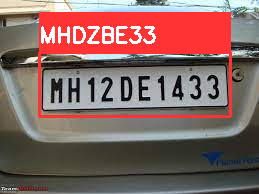

In [ ]:
x,y,w,h = plate_coords[0]
read = predstring

cv2.rectangle(img, (x,y), (x+w, y+h), (51,51,255), 2)
cv2.rectangle(img, (x, y - 40), (x + w, y),(51,51,255) , -1)
cv2.putText(img,read, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
cv2_imshow(img)